# Time Series Visualization with `plot_series`

This notebook demonstrates how to use the `plot_series` method from the `DataVisualization` class to visualize time series data, including:

- Random time series,
- Trends,
- Seasonality and noise,
- Missing values (events).

The function returns a `matplotlib.figure.Figure` object and is useful for exploratory data analysis and visual reports.

## Using mock data as example

We start by importing the required libraries and defining the `DataVisualization` class, which includes the static method `plot_series`.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ThreeWToolkit.data_visualization import DataVisualization

### Example 1: Random Time Series

We generate a random time series with daily frequency. The `plot_series` method is used to display the values with a custom title and labeled axes.

/tmp/ipykernel_18241/94925399.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


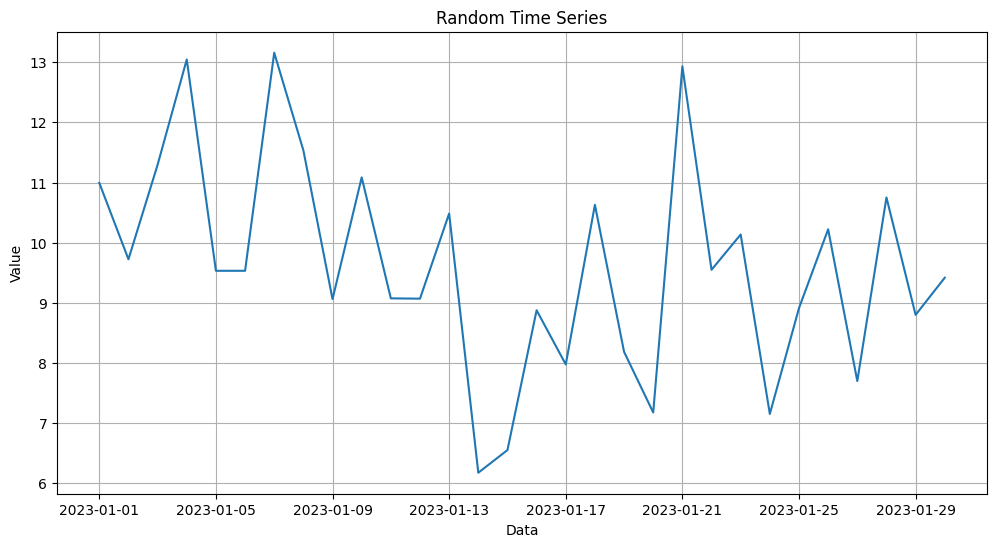

In [2]:
np.random.seed(42)
dates = pd.date_range("2023-01-01", periods=30, freq="D")
values = np.random.normal(loc=10, scale=2, size=30)
series = pd.Series(values, index=dates)

fig = DataVisualization.plot_series(
    series=series,
    title="Random Time Series",
    xlabel="Data",
    ylabel="Value",
    overlay_events=False
)
fig.show()

### Example 2: Using plot_series with multiple subplots (ax provided)

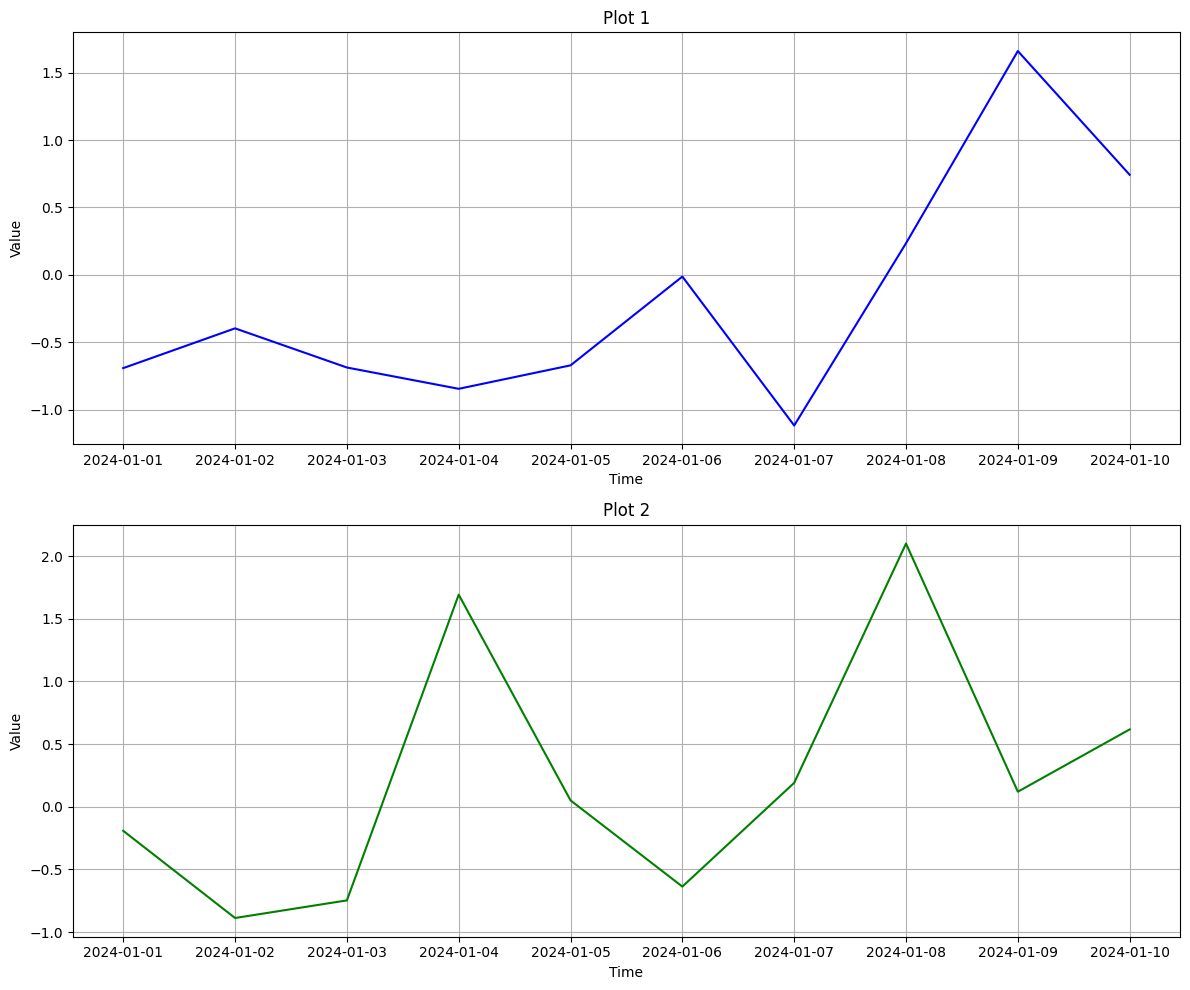

In [7]:
# Create two sample series
dates = pd.date_range("2024-01-01", periods=10)
series1 = pd.Series(np.random.randn(10), index=dates)
series2 = pd.Series(np.random.randn(10), index=dates)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Use plot_series with specified Axes
DataVisualization.plot_series(series1, "Plot 1", "Time", "Value", ax=axs[0], color="blue")
DataVisualization.plot_series(series2, "Plot 2", "Time", "Value", ax=axs[1], color="green")

plt.tight_layout()
plt.show()


### Example 3: Time Series with Missing Values

We introduce some missing values (`NaN`) at specific positions. When `overlay_events=True`, the function overlays vertical dashed lines to highlight these missing data points — useful for anomaly or outage detection.


/tmp/ipykernel_18241/2354780735.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


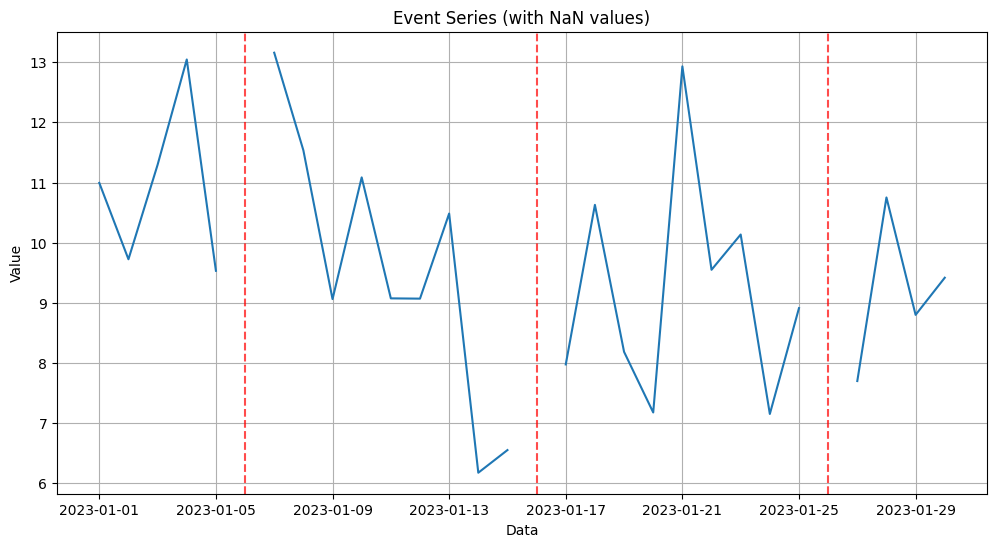

In [8]:
series_with_nans = series.copy()
series_with_nans.iloc[[5, 15, 25]] = np.nan  #adding NaNs

fig = DataVisualization.plot_series(
    series=series_with_nans,
    title="Event Series (with NaN values)",
    xlabel="Data",
    ylabel="Value",
    overlay_events=True
)
fig.show()

### Example 4: Linear Trend Series

We simulate a simple increasing trend. This type of series is commonly found in financial, environmental, or demographic time series.


/tmp/ipykernel_18241/1586506079.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


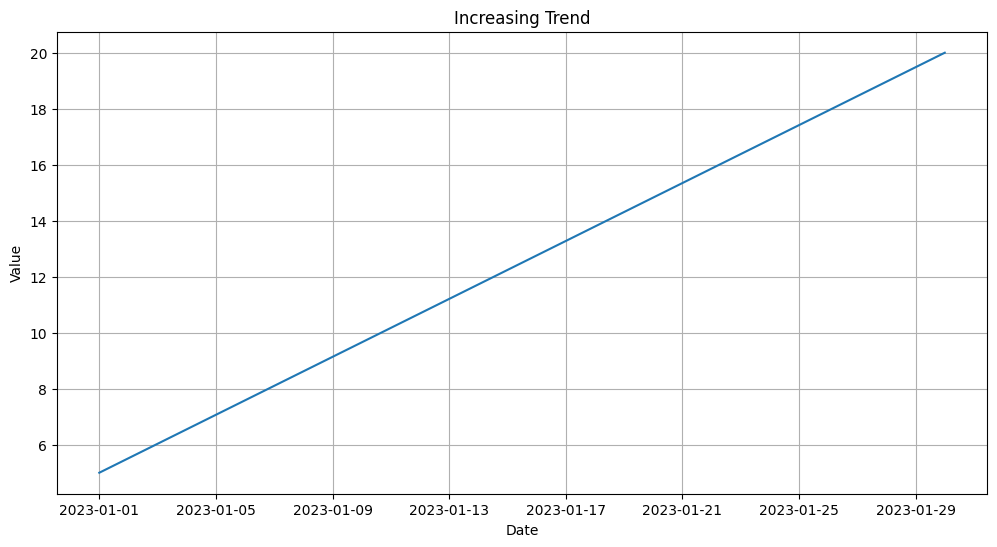

In [4]:
trend_series = pd.Series(np.linspace(5, 20, 30), index=dates)

fig = DataVisualization.plot_series(
    series=trend_series,
    title="Increasing Trend",
    xlabel="Date",
    ylabel="Value",
    overlay_events=False
)
fig.show()

### Example 5: Seasonality with Noise

A sinusoidal pattern is added to simulate seasonality, and Gaussian noise is included for realism. This is common in weather, sales, or electricity usage datasets.


/tmp/ipykernel_18241/2785720412.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


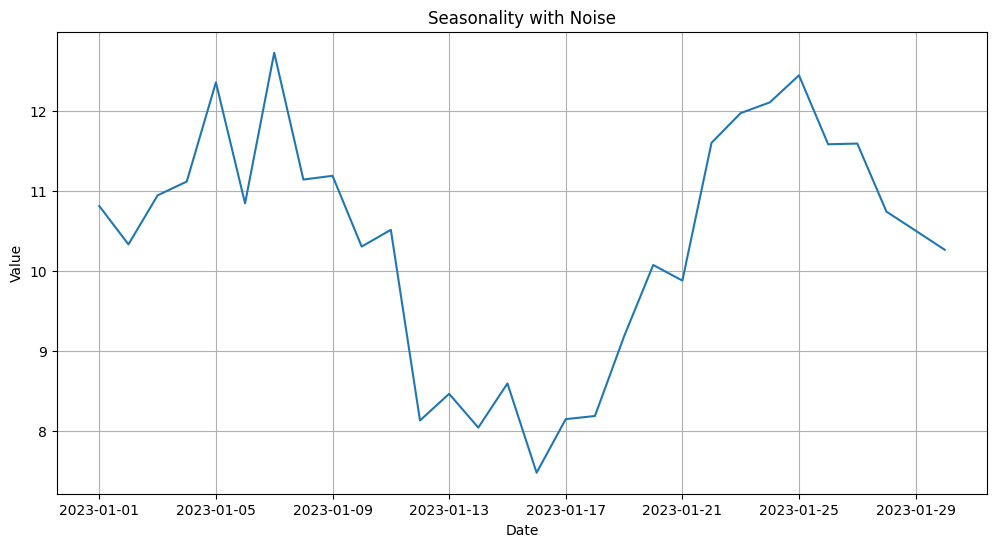

In [5]:
np.random.seed(1)
seasonal_series = pd.Series(
    10 + 2 * np.sin(np.linspace(0, 3 * np.pi, 30)) + np.random.normal(0, 0.5, 30),
    index=dates
)

fig = DataVisualization.plot_series(
    series=seasonal_series,
    title="Seasonality with Noise",
    xlabel="Date",
    ylabel="Value",
    overlay_events=False
)
fig.show()


## Using 3W data as example

We start by importing the required libraries and defining the `DataVisualization` class, which includes the static method `plot_series`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ThreeWToolkit.data_visualization import DataVisualization

Loading the 3W dataset

In [3]:
from ThreeWToolkit.core.base_dataset import ParquetDatasetConfig
from ThreeWToolkit.dataset import ParquetDataset
from pathlib import Path

# define path
dataset_path = Path("./data/3w_dataset/")

# create and load
ds_config = ParquetDatasetConfig(path=dataset_path, clean_data=False, download=True)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Found existing dataset at data/3w_dataset/download.
[ParquetDataset] Dataset already extracted at data/3w_dataset.


2228

In [4]:
sig = ds[123]["signal"].copy()

### Example 1: Simple Time Series Plot

DataVisualization: Chart saved to '/mnt/c/Users/mathe/Documents/Projects_2/3WToolkit/output/3w_plots/p-tpt.png'


/tmp/ipykernel_2720/356871807.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


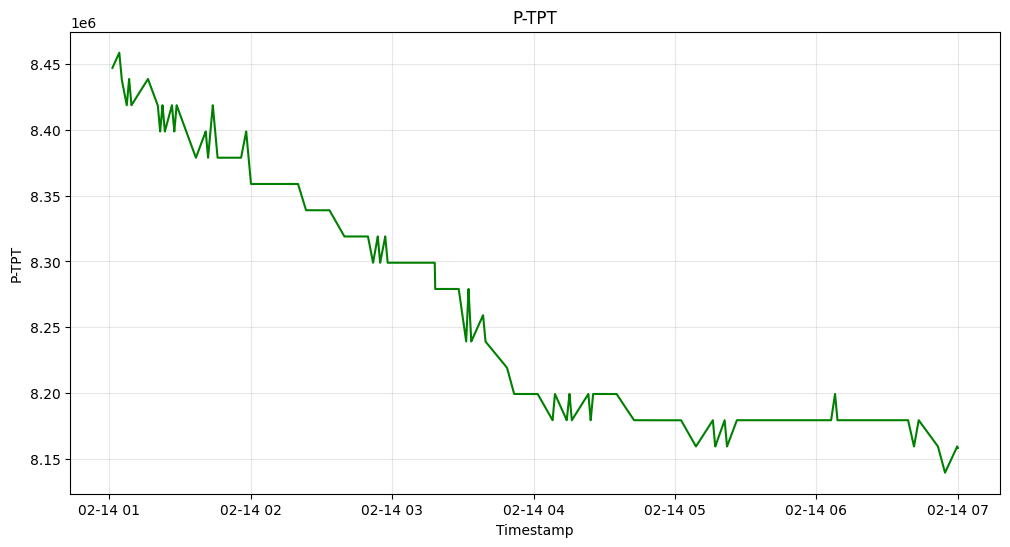

In [6]:
series = sig["P-TPT"]
fig,_ = DataVisualization.plot_series(
    series=series,
    title="P-TPT",
    xlabel="Timestamp",
    ylabel="P-TPT",
    overlay_events=False,
    color="green"
)
fig.show()


### Example 2: Using plot_series with multiple subplots (ax provided)

DataVisualization: Chart saved to '/mnt/c/Users/mathe/Documents/Projects_2/3WToolkit/output/3w_plots/p-tpt.png'
DataVisualization: Chart saved to '/mnt/c/Users/mathe/Documents/Projects_2/3WToolkit/output/3w_plots/p-anular.png'


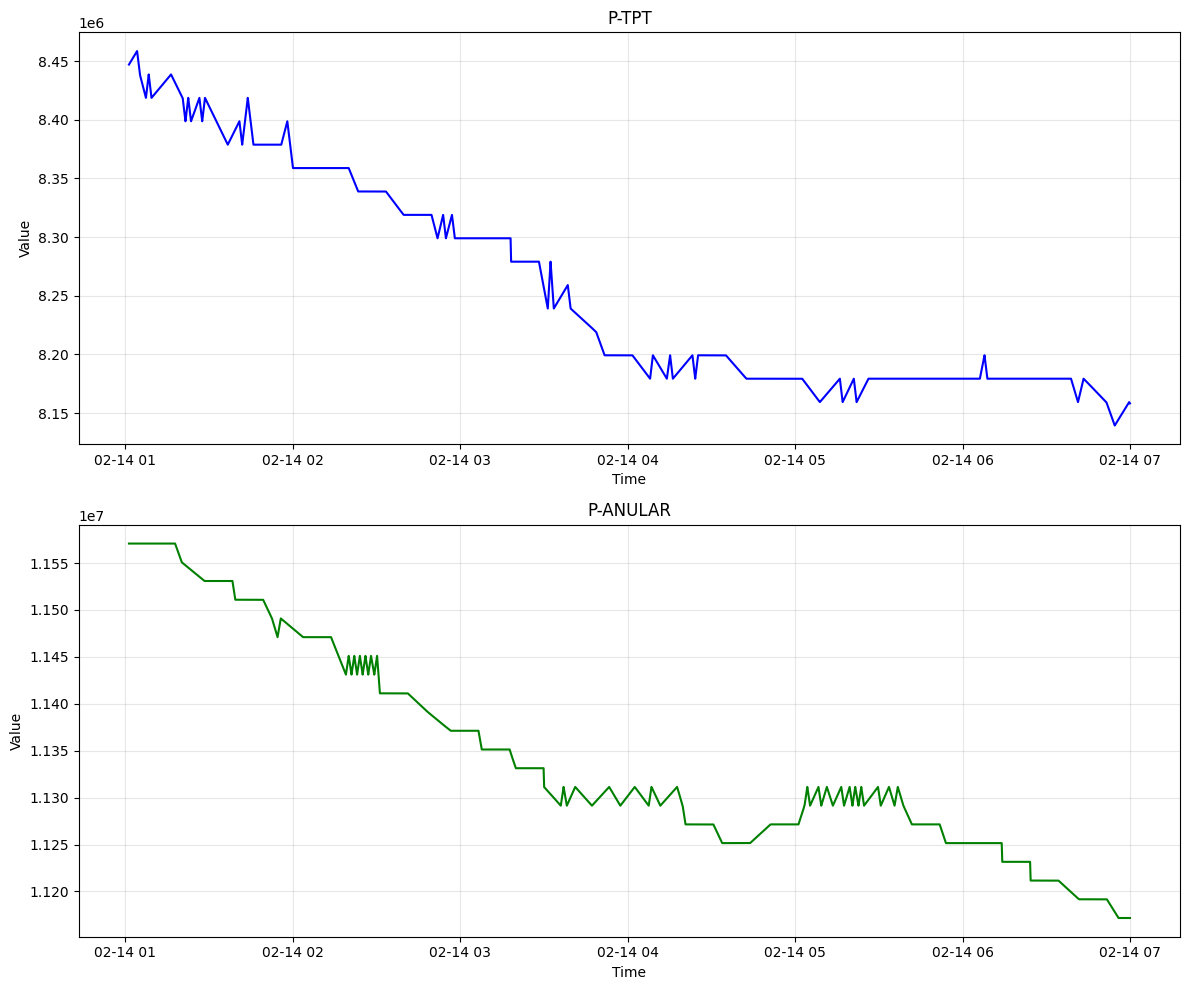

In [7]:
series_P_TPT = sig["P-TPT"]
series_P_ANULAR = sig["P-ANULAR"]

#create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

#use plot_series with specified Axes
DataVisualization.plot_series(series_P_TPT, "P-TPT", "Time", "Value", ax=axs[0], color="blue")
DataVisualization.plot_series(series_P_ANULAR, "P-ANULAR", "Time", "Value", ax=axs[1], color="green")

plt.tight_layout()
plt.show()


### Example 3: Time Series with Missing Values

We introduce some missing values (`NaN`) at specific positions. When `overlay_events=True`, the function overlays vertical dashed lines to highlight these missing data points — useful for anomaly or outage detection.

DataVisualization: Chart saved to '/mnt/c/Users/mathe/Documents/Projects_2/3WToolkit/output/3w_plots/event_series_with_nan_values.png'


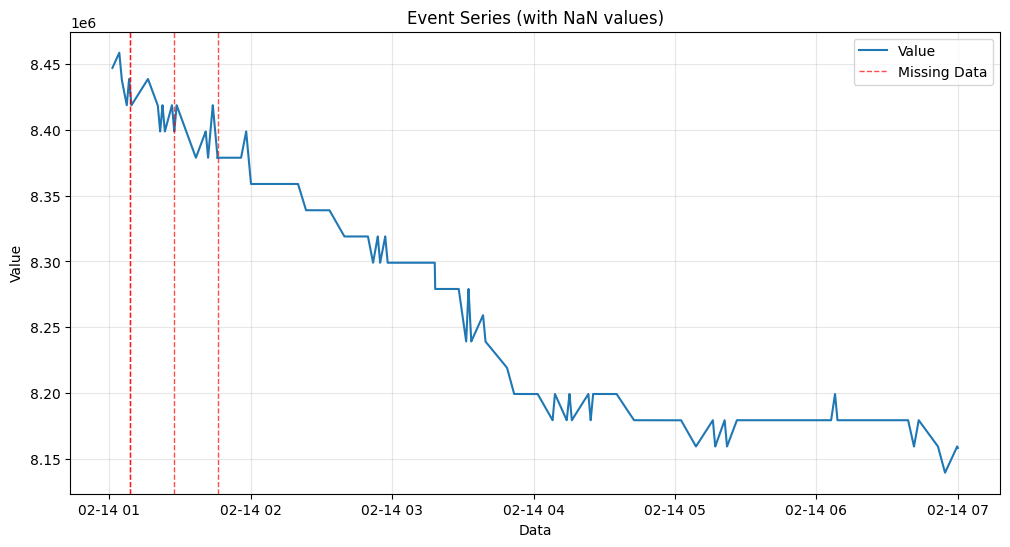

In [8]:
series_P_TPT = sig["P-TPT"].copy()
series_P_TPT.iloc[[456, 1567, 2678]] = np.nan  #adding NaNs

fig = DataVisualization.plot_series(
    series=series_P_TPT,
    title="Event Series (with NaN values)",
    xlabel="Data",
    ylabel="Value",
    overlay_events=True
)
plt.show()

## Conclusion

The `plot_series` method provides a clean and reusable way to visualize time series with:

- Custom titles and axis labels,
- Event overlays for missing values,
- Full support for `pandas.Series` with datetime indices.

This makes it a practical tool for time series forecasting, anomaly detection, and reporting in real-world pipelines.
